### Настройка Airflow

Для начала вам необходимо выполнить ряд команд чтобы настроить окружение для дальнейшей работы, это позволит первое время не заниматься настройкой среды исполнения, а сразу начать писать код и работать с Airflow.

In [1]:
# Установка Airflow
!pip install apache-airflow==2.1.4

# Инициализация базы данных
!airflow db init

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 

In [2]:
# Создадим необходимые папки
!mkdir /root/airflow/dags
!touch /root/airflow/dags/dag.py

In [3]:
# Включим веб-сервер
!airflow webserver -p 18273 -D

/usr/local/lib/python3.8/dist-packages/flask_appbuilder/models/sqla/interface.py:68 SAWarning: relationship 'DagRun.serialized_dag' will copy column serialized_dag.dag_id to column dag_run.dag_id, which conflicts with relationship(s): 'DagRun.task_instances' (copies task_instance.dag_id to dag_run.dag_id), 'TaskInstance.dag_run' (copies task_instance.dag_id to dag_run.dag_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="dag_run,task_instances"' to the 'DagRun.serialized_dag' relationship. (Background on this error at: https://sqlalche.me/e/14/qzyx)
/usr/local/lib/python3.8/dist-packages/flask_appbuilder/models/sqla/interface.py

In [4]:
# Создадим пользователя Airflow
!airflow users create \
          --username admin \
          --firstname admin \
          --lastname admin \
          --role Admin \
          --email admin@example.org \
          -p 12345

/usr/local/lib/python3.8/dist-packages/flask_appbuilder/models/sqla/interface.py:68 SAWarning: relationship 'DagRun.serialized_dag' will copy column serialized_dag.dag_id to column dag_run.dag_id, which conflicts with relationship(s): 'DagRun.task_instances' (copies task_instance.dag_id to dag_run.dag_id), 'TaskInstance.dag_run' (copies task_instance.dag_id to dag_run.dag_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="dag_run,task_instances"' to the 'DagRun.serialized_dag' relationship. (Background on this error at: https://sqlalche.me/e/14/qzyx)
/usr/local/lib/python3.8/dist-packages/flask_appbuilder/models/sqla/interface.py

Поместите в dag.py следующий код.

```python
from airflow import DAG
from datetime import timedelta
from airflow.utils.dates import days_ago
from airflow.operators.dummy_operator import DummyOperator

dag = DAG('dag',schedule_interval=timedelta(days=1), start_date=days_ago(1))
t1 = DummyOperator(task_id='task_1', dag=dag)
t2 = DummyOperator(task_id='task_2',dag=dag)
t3 = DummyOperator(task_id='task_3',dag=dag)
t4 = DummyOperator(task_id='task_4',dag=dag)
t5 = DummyOperator(task_id='task_5',dag=dag)
t6 = DummyOperator(task_id='task_6',dag=dag)
t7 = DummyOperator(task_id='task_7',dag=dag)

[t1, t2]>>t5
t3>>t6
[t5,t6] >>  t7
t4
```

In [5]:
# Запуск шедулера
!airflow scheduler -D

/usr/local/lib/python3.8/dist-packages/airflow/utils/cli.py:149 SAWarning: relationship 'DagRun.serialized_dag' will copy column serialized_dag.dag_id to column dag_run.dag_id, which conflicts with relationship(s): 'DagRun.task_instances' (copies task_instance.dag_id to dag_run.dag_id), 'TaskInstance.dag_run' (copies task_instance.dag_id to dag_run.dag_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="dag_run,task_instances"' to the 'DagRun.serialized_dag' relationship. (Background on this error at: https://sqlalche.me/e/14/qzyx)
/usr/local/lib/python3.8/dist-packages/airflow/utils/cli.py:149 SAWarning: relationship 'SerializedD

In [7]:
# Последующие команды не имеют отношения к Airflow
# Они нужни только для корректной работы веб морды
# в среде Google Colab

!pip install pyngrok
!ngrok authtoken  2MBRgJ066swk4ThgvdLuWtytQAI_3WLNSDpTtkwHYi33C27nr # найти его можно https://dashboard.ngrok.com/get-started/setup 

# Эта команда просто отображет веб морду на другой адрес
# Его вы можете найти https://dashboard.ngrok.com/cloud-edge/status
# При каждом отключении ссылка будет меняться
!nohup ngrok http -log=stdout 18273 > /dev/null &

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
nohup: redirecting stderr to stdout


После запуска команды выше, перейдите по адресу в ngrok и подождите  пока появится DAG с именем dag. 

***Запустите его несколько раз!!!!***

***Запустите его несколько раз!!!!***

***Запустите его несколько раз!!!!***

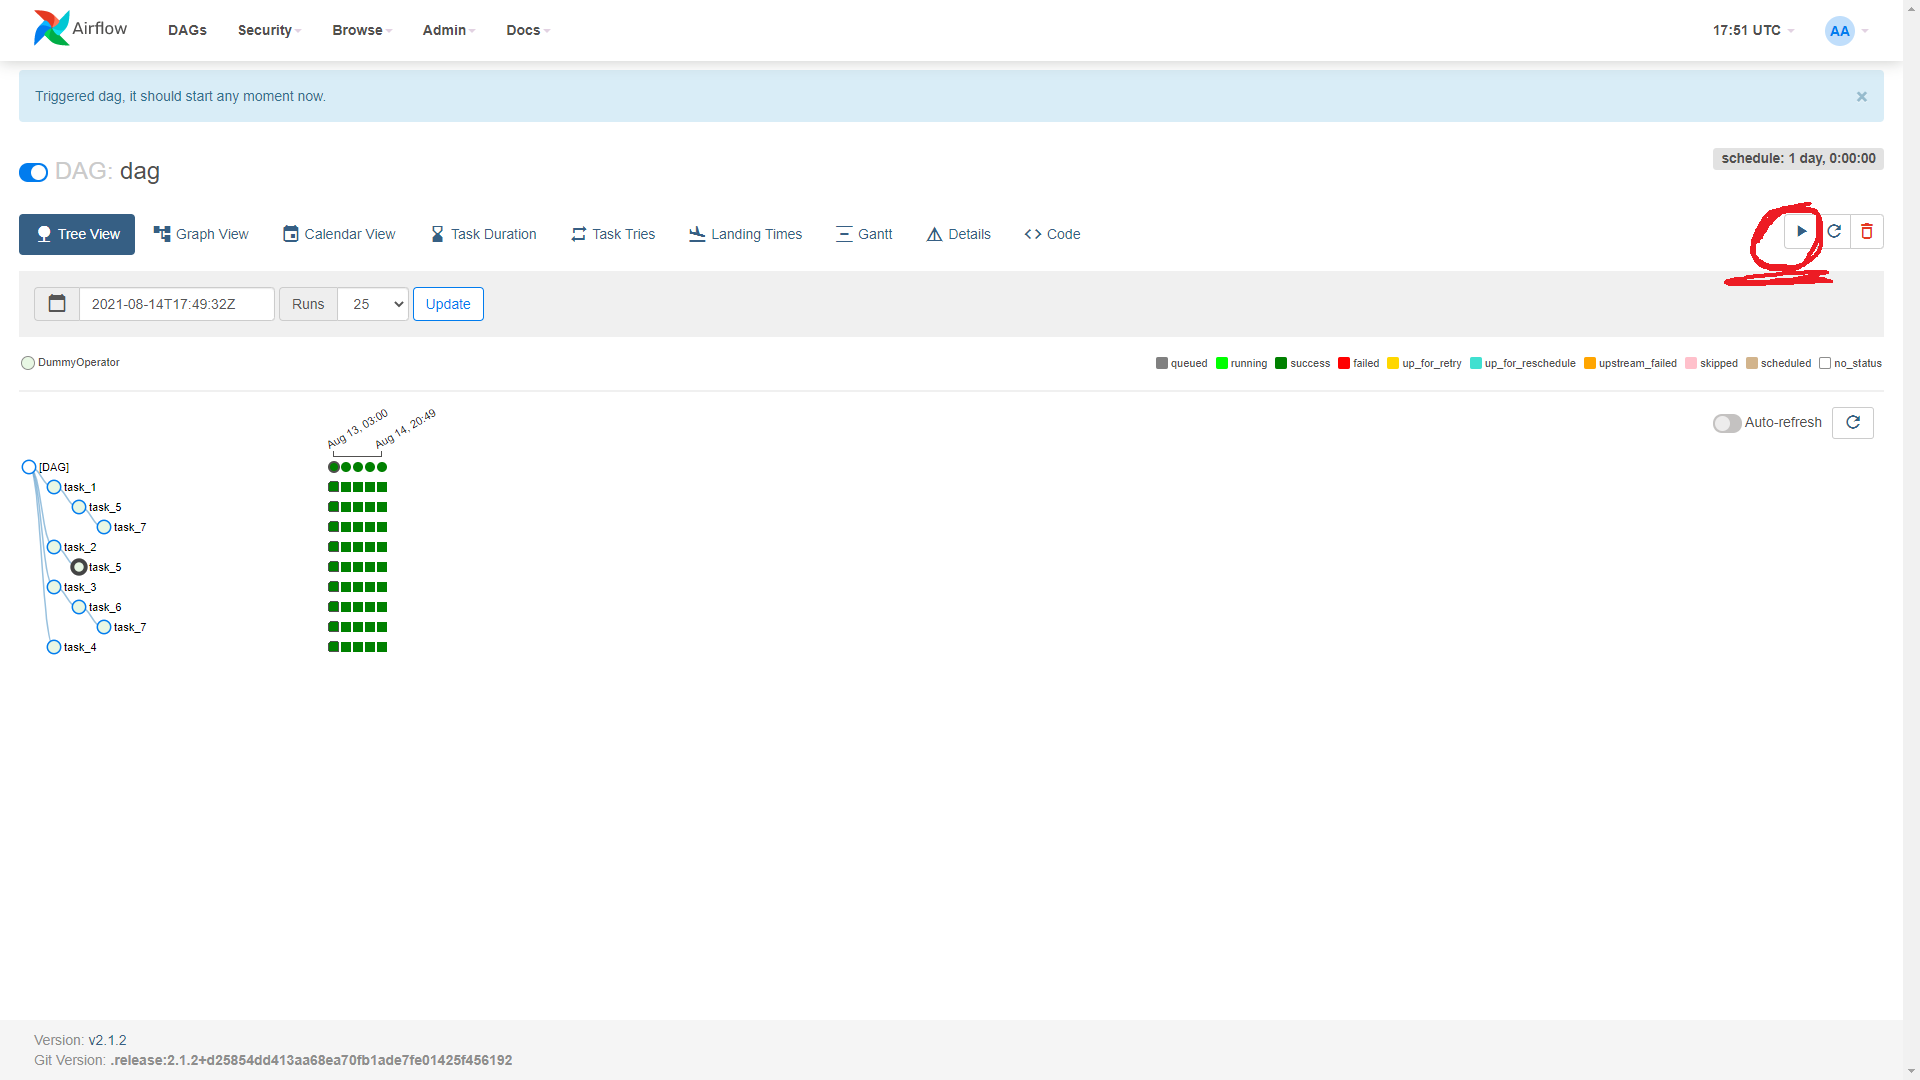

### Практика

**На этом занятии мы будем разбираться с базой метаданных**

#### Посмотрим на структуру таблиц


In [8]:
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql sqlite:////root//airflow/airflow.db
%sql SELECT distinct tbl_name FROM sqlite_master WHERE type='table';

# Задание 1
# В ответе напишите количество таблиц

 * sqlite:////root//airflow/airflow.db


,tbl_name
0,alembic_version
1,dag_pickle
2,import_error
3,job
4,log
5,sla_miss
6,variable
7,task_fail
8,task_reschedule
9,serialized_dag


#### Посмотрим на запуски нашего дага

In [9]:
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql sqlite:////root//airflow/airflow.db
%sql SELECT * FROM task_instance

# Задание 2
# В ответе напишите значение в поле unixname

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:////root//airflow/airflow.db


,task_id,dag_id,execution_date,start_date,end_date,duration,state,try_number,hostname,unixname,...,queue,priority_weight,operator,queued_dttm,pid,max_tries,executor_config,pool_slots,queued_by_job_id,external_executor_id
0,task_1,dag,2023-02-25 00:00:00.000000,2023-02-26 18:22:15.751928,2023-02-26 18:22:15.751943,0.0,success,0,,root,...,default,3,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
1,task_2,dag,2023-02-25 00:00:00.000000,2023-02-26 18:22:15.751928,2023-02-26 18:22:15.751943,0.0,success,0,,root,...,default,3,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
2,task_3,dag,2023-02-25 00:00:00.000000,2023-02-26 18:22:15.751928,2023-02-26 18:22:15.751943,0.0,success,0,,root,...,default,3,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
3,task_4,dag,2023-02-25 00:00:00.000000,2023-02-26 18:22:15.751928,2023-02-26 18:22:15.751943,0.0,success,0,,root,...,default,1,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
4,task_5,dag,2023-02-25 00:00:00.000000,2023-02-26 18:22:16.953188,2023-02-26 18:22:16.953196,0.0,success,0,,root,...,default,2,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
5,task_6,dag,2023-02-25 00:00:00.000000,2023-02-26 18:22:16.953188,2023-02-26 18:22:16.953196,0.0,success,0,,root,...,default,2,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
6,task_7,dag,2023-02-25 00:00:00.000000,2023-02-26 18:22:18.125683,2023-02-26 18:22:18.125694,0.0,success,0,,root,...,default,1,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
7,task_1,dag,2023-02-26 18:22:20.301362,2023-02-26 18:22:21.079184,2023-02-26 18:22:21.079192,0.0,success,0,,root,...,default,3,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
8,task_2,dag,2023-02-26 18:22:20.301362,2023-02-26 18:22:21.079184,2023-02-26 18:22:21.079192,0.0,success,0,,root,...,default,3,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None
9,task_3,dag,2023-02-26 18:22:20.301362,2023-02-26 18:22:21.079184,2023-02-26 18:22:21.079192,0.0,success,0,,root,...,default,3,DummyOperator,None,None,0,b'\x80\x05}\x94.',1,None,None


#### Посмотрим на логи

In [10]:
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql sqlite:////root//airflow/airflow.db
%sql SELECT * FROM log order by length(event) desc

# Задание 3
# В ответе напишите первый event

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:////root//airflow/airflow.db


,id,dttm,dag_id,task_id,event,execution_date,owner,extra
0,2,2023-02-26 18:10:03.598827,None,None,cli_users_create,None,root,"{""host_name"": ""8c5de88b5cd4"", ""full_command"": ..."
1,1,2023-02-26 18:09:47.838563,None,None,cli_webserver,None,root,"{""host_name"": ""8c5de88b5cd4"", ""full_command"": ..."
2,3,2023-02-26 18:14:27.795189,None,None,cli_scheduler,None,root,"{""host_name"": ""8c5de88b5cd4"", ""full_command"": ..."
3,7,2023-02-26 18:22:16.983117,dag,None,tree_data,None,admin,"[('dag_id', 'dag'), ('num_runs', '25'), ('root..."
4,8,2023-02-26 18:22:19.987204,dag,None,tree_data,None,admin,"[('dag_id', 'dag'), ('num_runs', '25'), ('root..."
5,11,2023-02-26 18:22:24.884914,dag,None,tree_data,None,admin,"[('dag_id', 'dag'), ('num_runs', '25'), ('root..."
6,14,2023-02-26 18:22:35.685060,dag,None,tree_data,None,admin,"[('dag_id', 'dag'), ('num_runs', '25'), ('root..."
7,15,2023-02-26 18:22:38.702392,dag,None,tree_data,None,admin,"[('dag_id', 'dag'), ('num_runs', '25'), ('root..."
8,18,2023-02-26 18:22:49.676225,dag,None,tree_data,None,admin,"[('dag_id', 'dag'), ('num_runs', '25'), ('root..."
9,21,2023-02-26 18:22:53.931586,dag,None,tree_data,None,admin,"[('dag_id', 'dag'), ('num_runs', '25'), ('root..."


#### Посмотрим на список дагов

In [11]:
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql sqlite:////root//airflow/airflow.db
%sql SELECT * FROM dag

# Задание 4
# В ответе напишите root_dag_id которые не None, как видите зависимость может быть не только между тасками но и дагами

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:////root//airflow/airflow.db


,dag_id,is_paused,is_subdag,is_active,last_parsed_time,last_pickled,last_expired,scheduler_lock,pickle_id,fileloc,owners,description,default_view,schedule_interval,root_dag_id,next_dagrun,next_dagrun_create_after,concurrency,has_task_concurrency_limits,max_active_runs
0,example_complex,1,0,1,2023-02-26 18:23:34.566079,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,null,None,None,None,16,0,16
1,example_short_circuit_operator,1,0,1,2023-02-26 18:23:53.996052,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,"{""type"": ""timedelta"", ""attrs"": {""days"": 1, ""se...",None,2023-02-24 00:00:00.000000,2023-02-25 00:00:00.000000,16,0,16
2,example_trigger_controller_dag,1,0,1,2023-02-26 18:23:41.292273,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,"""@once""",None,2023-02-24 00:00:00.000000,2023-02-24 00:00:00.000000,16,0,16
3,latest_only,1,0,1,2023-02-26 18:24:03.526562,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,"{""type"": ""timedelta"", ""attrs"": {""days"": 0, ""se...",None,2023-02-24 00:00:00.000000,2023-02-24 04:00:00.000000,16,0,16
4,example_subdag_operator,1,0,1,2023-02-26 18:23:49.043734,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,"""@once""",None,2023-02-24 00:00:00.000000,2023-02-24 00:00:00.000000,16,0,16
5,example_python_operator,1,0,1,2023-02-26 18:23:57.228618,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,null,None,None,None,16,0,16
6,example_branch_operator,1,0,1,2023-02-26 18:23:37.379741,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,"""@daily""",None,2023-02-24 00:00:00.000000,2023-02-25 00:00:00.000000,16,0,16
7,example_trigger_target_dag,1,0,1,2023-02-26 18:23:55.940593,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,null,None,None,None,16,0,16
8,example_subdag_operator.section-2,1,1,1,2023-02-26 18:23:49.072287,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,None,tree,"""@daily""",example_subdag_operator,None,None,16,0,16
9,tutorial,1,0,1,2023-02-26 18:23:50.740861,None,None,None,None,/usr/local/lib/python3.8/dist-packages/airflow...,airflow,A simple tutorial DAG,tree,"{""type"": ""timedelta"", ""attrs"": {""days"": 1, ""se...",None,2023-02-24 00:00:00.000000,2023-02-25 00:00:00.000000,16,0,16
